In [1]:
import sys
sys.path.append('../Codes/')
sys.path.append('../Codes/Python/')
import numpy as np
import matplotlib.pyplot as plt
from Immuno_models import*
#from Bio import Phylo
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return a - b*(x-c)**2

Text_files_path = '../../../../Dropbox/Research/Evolution_Immune_System/Text_files/'

N_A = 6.02214076e23
k_BT = 1.380649e-23*293
style.use('seaborn-paper')
print(style.available)
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


# Ising Model

In [56]:
data=(np.loadtxt('../Codes/Ising_model/output.txt'))
E = data[:,0]

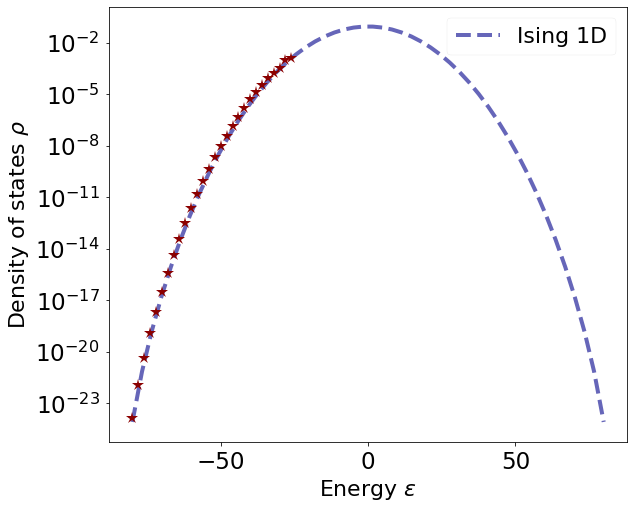

In [71]:
fig, ax = plt.subplots(figsize = (10,8), gridspec_kw={'left':0.18})
L = 80
ds = np.linspace(0, L );
data_E = np.histogram(E, bins = 'auto', density = True);
#ax.plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);+
#ax.plot(data_E[1][:-1], (2**(50))**(-1)*np.exp(-data_E[1][:-1]/1)*sc.comb(L, (data_E[1][:-1]+L)/2), color = 'olive', linestyle = '--', marker = '', ms = 10);
ax.plot(ds*2-L, sc.comb(L, ds)/2**(L) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--', alpha = 0.6);
ax.plot(data_E[1][:-1], data_E[0]/(1e10*(2**(L))**(-1)*np.exp(-data_E[1][:-1]/1)), color = 'darkred', linestyle = '', marker = '*', ms = 12);

ax.set_yscale('log');
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)
fig.savefig('../Figures/Dimensionality/Ising.png')


In [8]:
print('%.2e'%(2**80),'%.2e'%(len(E)))

1.21e+24 8.00e+06


# NetMHC

In [76]:
energies = np.exp((np.loadtxt('../../../../Dropbox/Simulations_Tail/tail_%.1f.txt'%(T))))
energies

array([11.96, 13.87, 13.87, ...,  5.14,  5.14,  5.14])

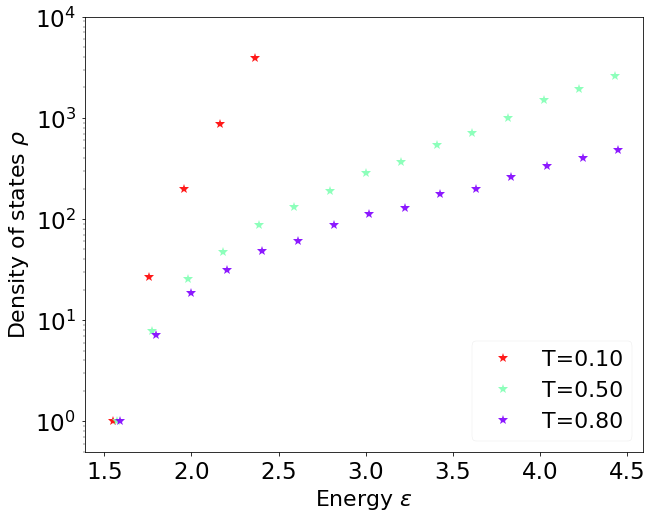

In [82]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
Ts = np.array([0.1, 0.5, 0.8])
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,len(Ts))), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
for i, T in enumerate(Ts):
    energies = np.exp((np.loadtxt('../../../../Dropbox/Simulations_Tail/tail_%.1f.txt'%(T))))
    ds = np.linspace(0, L);
    data_E = np.histogram(energies, bins =np.linspace(np.min(energies),np.min(energies) + 10,50), density = False);
    #data_E = np.histogram(energies, bins ='auto', density = False);
    #E_0s = np.append(E_0s, data_E[0][0]/(np.exp(-data_E[1][0]/T)))
    ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[1].plot(data_E_2[1][:-1], (data_E_2[0]/(np.exp(-data_E_2[1][:-1]/T)))/(data_E_2[0][0]/(np.exp(-data_E_2[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[0].plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);
    
ax.set_xlim(np.min(energies)-.2,np.min(energies)+3)
ax.set_ylim(.5,1e4)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 4, fontsize = 22)

fig.savefig('../Figures/Dimensionality/NetMHC.png')



# MJ Matrix

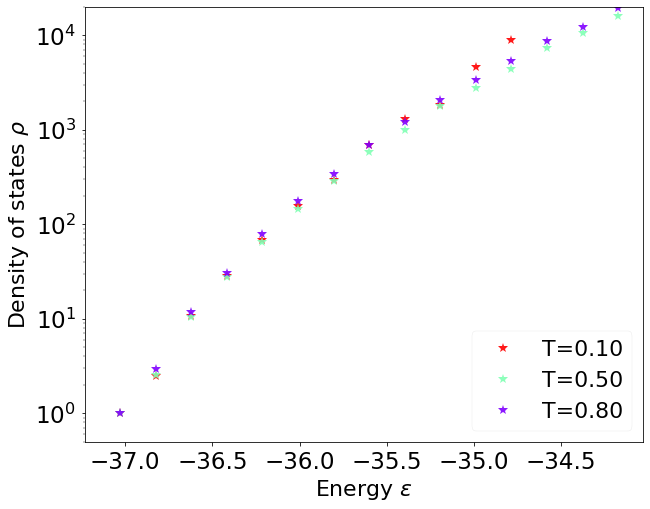

In [60]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
antigen = 'TACNSEYPN'
L = 9
N = 1e8
Ts = np.array([0.1, 0.5, 0.8])
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,len(Ts))), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
for i, T in enumerate(Ts):
    energies = (np.loadtxt(Text_files_path + 'MCMC/energies_L-%d_T-%.6f_N-%d_Antigen-'%(L, T, N)+antigen+'.txt'))
    ds = np.linspace(0, L);
    data_E = np.histogram(energies, bins = np.linspace(np.min(energies), np.min(energies)+10, 50), density = False);
    #data_E = np.histogram(energies, bins ='auto', density = False);
    #E_0s = np.append(E_0s, data_E[0][0]/(np.exp(-data_E[1][0]/T)))
    ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[1].plot(data_E_2[1][:-1], (data_E_2[0]/(np.exp(-data_E_2[1][:-1]/T)))/(data_E_2[0][0]/(np.exp(-data_E_2[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[0].plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);
    
ax.set_xlim(np.min(energies)-.2,np.min(energies)+3)
ax.set_ylim(.5,2e4)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 4, fontsize = 22)

fig.savefig('../Figures/Dimensionality/MJ.png')